In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

# SARIMA

In [6]:
df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/co2_mm_mlo.csv')

In [7]:
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [8]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [9]:
df = df.set_index('date')
df.index.freq = 'MS'

In [10]:
df.head(3)

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50


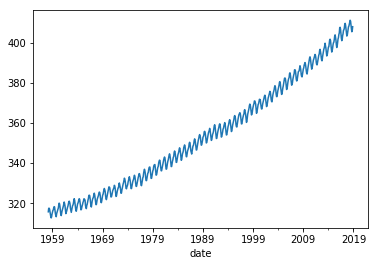

In [11]:
df['interpolated'].plot()

In [12]:
result = seasonal_decompose(df['interpolated'],model='add')

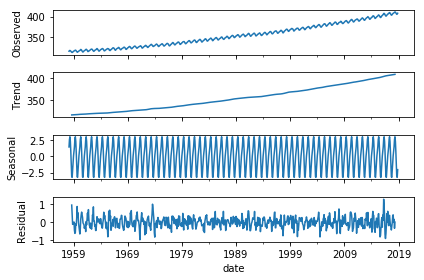

In [16]:
result.plot();

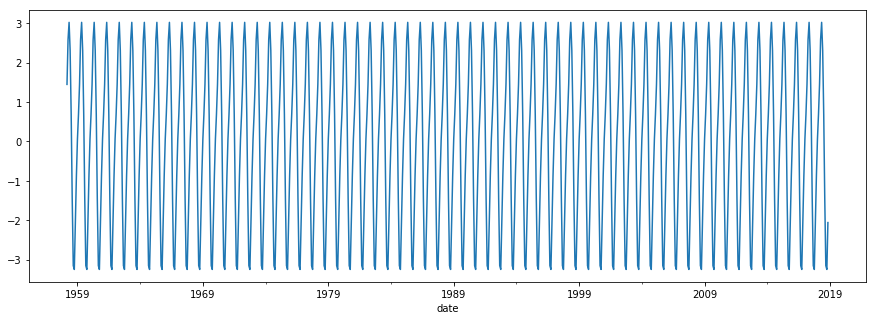

In [17]:
result.seasonal.plot(figsize=(15,5))

In [19]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -207.448
Date:                            Mon, 22 Jul 2019   AIC                            424.897
Time:                                    07:59:12   BIC                            447.848
Sample:                                         0   HQIC                           433.753
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      0.978      0.328      -0.001       0.002
ma.L1         -0.3800      0.034    -11.154      0.000      -0.447      -0.313
ar.S.L12       0.9996      0.000   3169.187      0.000       0.999       1.000
ma.S.L12      -0.8648      0.021    -40.257      0.000      -0.907      -0.823
sigma2         0.0962      0.005     20.328      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       52.15   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.09   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
len(df)

729

In [21]:
train = df.iloc[:717]
test = df.iloc[717:]

In [22]:
model = SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))

In [23]:
results = model.fit()

In [38]:
predictions = results.predict(len(train),len(df)-1,typ='levels').rename('predictions SARIMA')

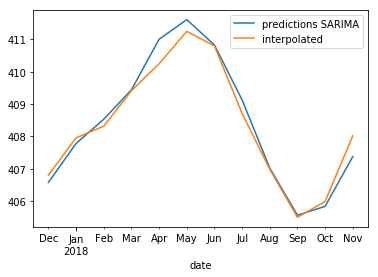

In [39]:
predictions.plot(legend=True)
test['interpolated'].plot(legend=True)

In [40]:
from statsmodels.tools.eval_measures import rmse

In [41]:
rmse(test['interpolated'],predictions)

0.34626094266692364

In [42]:
test['interpolated'].mean()

408.3333333333333

### forecast

In [43]:
model = SARIMAX(df['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results = model.fit()

In [44]:
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA FORECAST')

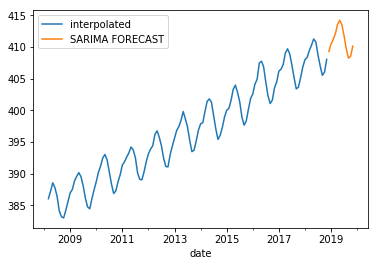

In [50]:
df['interpolated'].iloc[600:].plot(legend=True)
fcast.plot(legend=True)

# SARIMAX

In [51]:
df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [52]:
df.index.freq = 'D'

In [53]:
df.head(2)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0


In [54]:
df1 = df.dropna()

In [55]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [56]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [60]:
cols = ['rest1', 'rest2', 'rest3','rest4','total']
for col in cols:
    df1[col] = df1[col].astype(int)

In [61]:
df1.head(2)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191


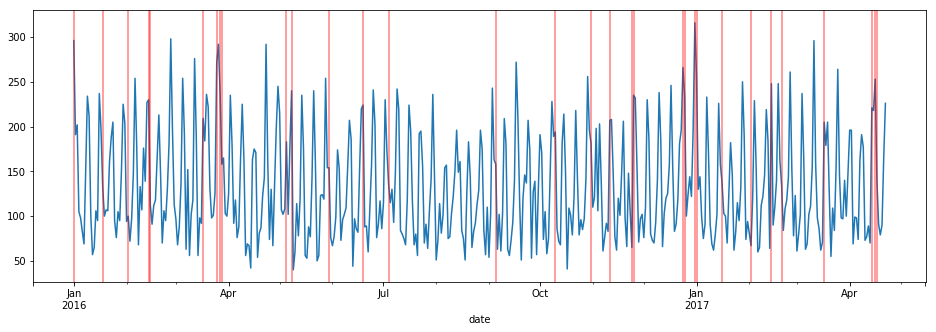

In [69]:
ax = df1['total'].plot(figsize=(16,5))
for day in df1[df1['holiday']==1].index:
    ax.axvline(x=day,color='red',alpha=0.5)

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

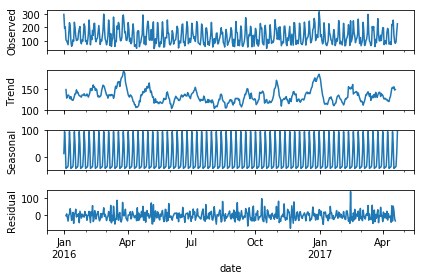

In [73]:
result = seasonal_decompose(df1['total'],model='add')
result.plot();

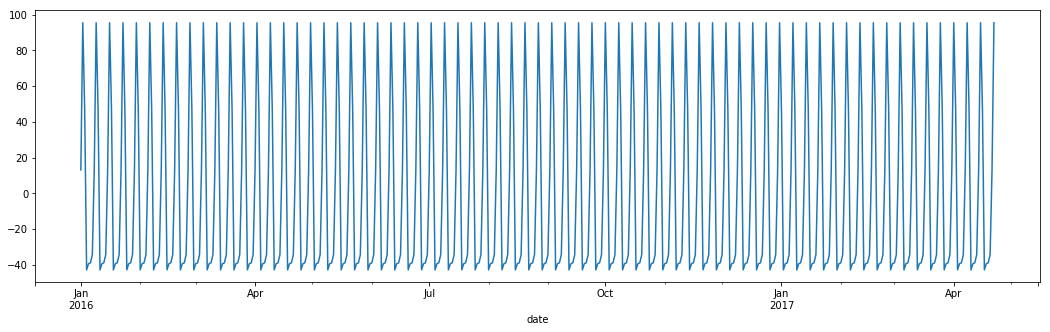

In [75]:
result.seasonal.plot(figsize=(18,5))

In [76]:
len(df1)

478

In [78]:
train=df1.iloc[:436]
test=df1.iloc[436:]

In [79]:
from pmdarima import auto_arima

### test sarima without EXO

In [82]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Mon, 22 Jul 2019   AIC                           4845.442
Time:                                   08:56:49   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5673      4.363      4.714      0.000      12.016      29.119
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.4052     86.680     16.468      0.000    1257.516    1597.294
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [86]:
results = model.fit()

In [91]:
predictions = results.predict(len(train),len(df1)-1,typ='levels').rename('SARIMA preds')

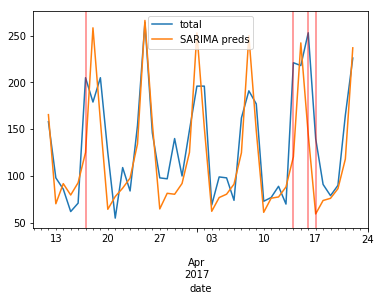

In [94]:
ax = test['total'].plot(legend=True)
predictions.plot(legend=True)
for day in test[test['holiday']==1].index:
    ax.axvline(x=day,color='red',alpha=0.5)

In [93]:
from statsmodels.tools.eval_measures import rmse

In [95]:
rmse(predictions,test['total'])

41.26315497464824

# SARIMAX

In [96]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.650
Date:                           Mon, 22 Jul 2019   AIC                           4709.299
Time:                                   09:19:38   BIC                           4734.317
Sample:                                        0   HQIC                          4719.135
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5530      4.274      2.703      0.007       3.176      19.929
x1            74.8267      4.545     16.464      0.000      65.919      83.734
ma.L1          0.1782      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5060      0.045     11.235      0.000       0.418       0.594
ar.S.L14       0.3843      0.043      8.983      0.000       0.300       0.468
sigma2      1141.9574     80.184     14.242      0.000     984.800    1299.115
===================================================================================
Ljung-Box (Q):                       85.09   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
model = SARIMAX(train['total'],exog=train[['holiday']],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [98]:
results = model.fit()

In [100]:
predictions = results.predict(len(train),len(train)+len(test)-1,exog=test[['holiday']]).rename('SARIMAX with EXO')

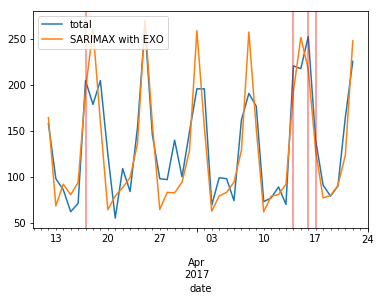

In [103]:
ax = test['total'].plot(legend=True)
predictions.plot(legend=True)
for day in test[test['holiday']==1].index:
    ax.axvline(x=day,color='red',alpha=0.5)

In [104]:
rmse(predictions,test['total'])

31.09251524372971

#### forecast

In [107]:
model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [108]:
results = model.fit()

In [111]:
fcast = results.predict(len(df1),len(df)-1,exog=df[478:][['holiday']]).rename("final SARIMAX forecast")

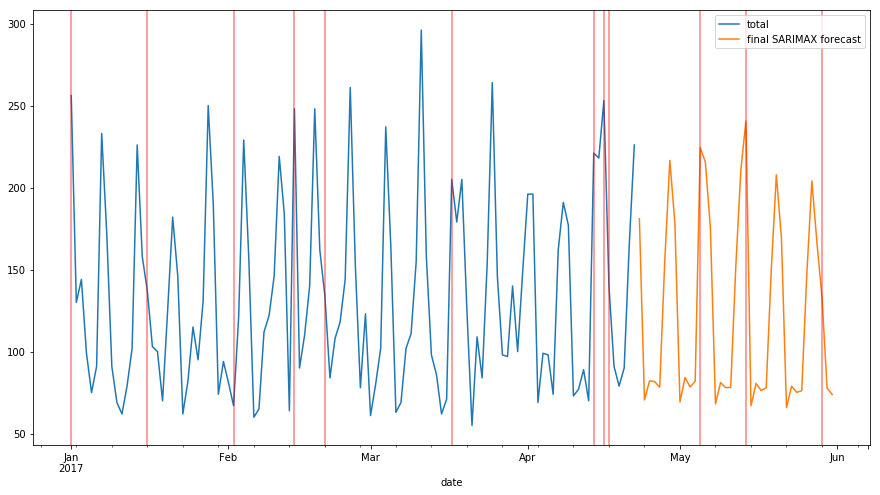

In [117]:
ax = df1['total'].loc['2017-01-01':].plot(legend=True,figsize=(15,8))
fcast.plot(legend=True)
for day in df[df['holiday']==1].loc['2017-01-01':].index:
    ax.axvline(x=day,color='red',alpha=0.5)